In [1]:
import numpy as np
from matplotlib import pyplot as plt

from qiskit import QuantumCircuit, Aer, execute

simulator = Aer.get_backend('statevector_simulator')
gates = ['x', 'y', 'z', 'h', 's', 't']

/Users/lihaog/miniconda3/envs/qiskit/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
/Users/lihaog/miniconda3/envs/qiskit/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
/Users/lihaog/miniconda3/envs/qiskit/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To 

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 1. 1.]]


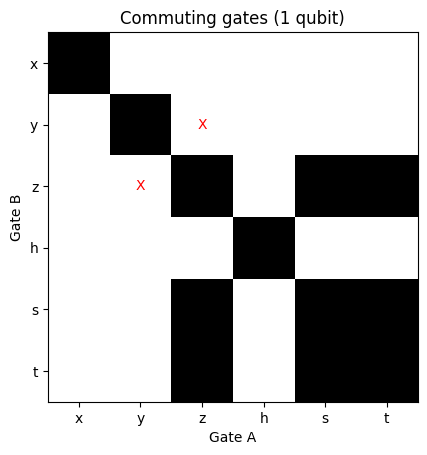

In [9]:
# Single qubit tests
# Create a table of the results of commuting gates
commute = np.zeros((len(gates), len(gates)))
for i, gateA in enumerate(gates):
    for j, gateB in enumerate(gates):
        # Create a Quantum Circuit
        qc = QuantumCircuit(1)
        qc.h(0)
        qc.__getattribute__(gateA)(0)
        qc.__getattribute__(gateB)(0)

        qc.draw('mpl', filename='Gates/%s%s_1.pdf'%(gateA,gateB))

        # Simulate the circuit
        job = execute(qc, simulator)
        result = job.result()

        # Get the state vector
        statevectorA = result.get_statevector()

        # Create a Quantum Circuit
        qc = QuantumCircuit(1)
        qc.h(0)
        qc.__getattribute__(gateB)(0)
        qc.__getattribute__(gateA)(0)

        qc.draw('mpl', filename='Gates/%s%s_1.pdf'%(gateB,gateA))

        # Simulate the circuit
        job = execute(qc, simulator)
        result = job.result()

        # Get the state vector
        statevectorB = result.get_statevector()
        
        # Compare the results
        if np.allclose(statevectorA, statevectorB):
            commute[i,j] = 1
        else:
            commute[i,j] = 0

# plot the table
fig, ax = plt.subplots()
ax.imshow(commute, cmap='Greys', vmin=0, vmax=1)
ax.set_xticks(np.arange(len(gates)))
ax.set_yticks(np.arange(len(gates)))
ax.set_xticklabels(gates)
ax.set_yticklabels(gates)
ax.set_xlabel('Gate A')
ax.set_ylabel('Gate B')
ax.set_title('Commuting gates (1 qubit)')

# label (y,z) and (z,y) as red
ax.text(2, 1, 'X', ha='center', va='center', color='r')
ax.text(1, 2, 'X', ha='center', va='center', color='r')

plt.savefig('Gates/commute1.pdf')
print(commute)

/Users/lihaog/miniconda3/envs/qiskit/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
/Users/lihaog/miniconda3/envs/qiskit/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
/Users/lihaog/miniconda3/envs/qiskit/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To 

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


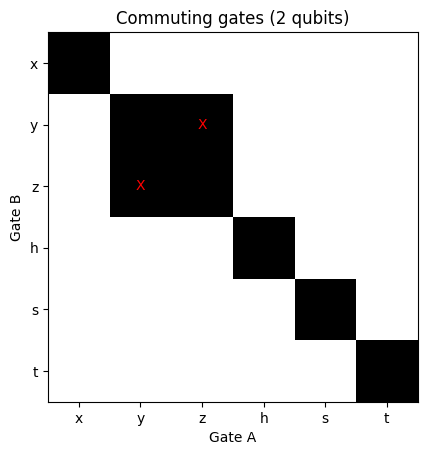

In [10]:
# Two qubit tests
# Create a table of the results of commuting gates
commute = np.zeros((len(gates), len(gates)))
for i, gateA in enumerate(gates):
    for j, gateB in enumerate(gates):
        # Create a Quantum Circuit
        qc = QuantumCircuit(2)
        qc.h(0)
        qc.h(1)
        qc.__getattribute__(gateA)(0)
        qc.__getattribute__(gateB)(1)

        qc.draw('mpl', filename='Gates/%s%s_2.pdf'%(gateA,gateB))

        # Simulate the circuit
        job = execute(qc, simulator)
        result = job.result()

        # Get the state vector
        statevectorA = result.get_statevector()

        # Create a Quantum Circuit
        qc = QuantumCircuit(2)
        qc.h(0)
        qc.h(1)
        qc.__getattribute__(gateA)(1)
        qc.__getattribute__(gateB)(0)

        qc.draw('mpl', filename='Gates/%s%s_2.pdf'%(gateB,gateA))

        # Simulate the circuit
        job = execute(qc, simulator)
        result = job.result()

        # Get the state vector
        statevectorB = result.get_statevector()
        
        # Compare the results
        if np.allclose(statevectorA, statevectorB):
            commute[i,j] = 1
        else:
            commute[i,j] = 0

# plot the table
fig, ax = plt.subplots()
ax.imshow(commute, cmap='Greys', vmin=0, vmax=1)
ax.set_xticks(np.arange(len(gates)))
ax.set_yticks(np.arange(len(gates)))
ax.set_xticklabels(gates)
ax.set_yticklabels(gates)
ax.set_xlabel('Gate A')
ax.set_ylabel('Gate B')
ax.set_title('Commuting gates (2 qubits)')

# label (y,z) and (z,y) as red
ax.text(2, 1, 'X', ha='center', va='center', color='r')
ax.text(1, 2, 'X', ha='center', va='center', color='r')

plt.savefig('Gates/commute2.pdf')

print(commute)